In [33]:
import numpy as np

In [49]:
import math
import matplotlib.pyplot as plt

% matplotlib inline

# Problem 1

In [35]:
x0=[0,1,math.pi/2]

In [36]:
def f(x):
    return math.cos(x)-x

In [37]:
def df(x):
    return -math.sin(x)-1

In [38]:
def dx(f,x):
    return abs(0-f(x))

In [39]:
def newtons_method(f, df, x0, epsilon):
    l=[x0]
    alpha=dx(f,x0)
    while alpha > epsilon:
        x0 = x0 - f(x0)/df(x0)
        l.append(x0)
        alpha=dx(f,x0)
    return l

In [69]:
l1=newtons_method(f, df, 0, 1e-8)

In [70]:
l1

[0, 1.0, 0.7503638678402439, 0.7391128909113617, 0.7390851333852839]

In [61]:
len(l1)

6

In [71]:
l2=newtons_method(f, df, 1, 1e-8)

In [72]:
l2

[1, 0.7503638678402439, 0.7391128909113617, 0.7390851333852839]

In [76]:
l3=newtons_method(f, df, math.pi/2, 1e-8)

In [77]:
l3

[1.5707963267948966,
 0.7853981633974483,
 0.7395361335152383,
 0.7390851781060102,
 0.739085133215161]

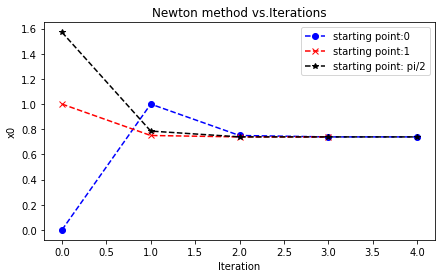

In [78]:
#from matplotlib.ticker import PercentFormatter

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

l1_graph,=plt.plot(range(0,len(l1)),l1,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
l2_graph,=plt.plot(range(0,len(l2)),l2,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
l3_graph,=plt.plot(range(0,len(l3)),l3,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
#ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Newton method vs.Iterations')
plt.xlabel('Iteration')
plt.ylabel('x0')

plt.legend([l1_graph,l2_graph,l3_graph],["starting point:0","starting point:1","starting point: pi/2"])

# Problem 2

In [ ]:
def f(x):
    return 0.25*x^4-3*x^3-7*x-5

In [143]:
def df(x):
    return x**3-9*(x**2)+7

In [144]:
def gradient_descent(df,x0,rate,epsilon):
    iteration=0
    cur_x=x0
    previous_step_size = 1
    l=[x0]
    while iteration<30 and previous_step_size > epsilon:
        prev_x = cur_x 
        cur_x = cur_x - rate * df(prev_x)
        l.append(cur_x)
        previous_step_size = abs(cur_x - prev_x)
        iteration=iteration+1
    return l
    
    

In [148]:
l1=gradient_descent(df, 0, 0.01, 1e-4)

In [149]:
l2=gradient_descent(df,0, 0.05, 1e-4)

In [150]:
l3=gradient_descent(df, 0, 0.1, 1e-4)

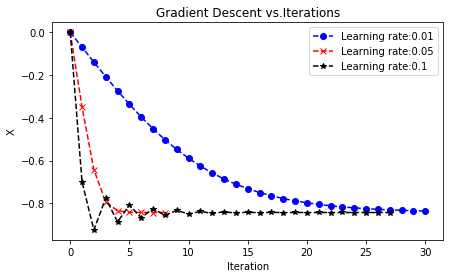

In [151]:

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

l1_graph,=plt.plot(range(0,len(l1)),l1,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=6)
l2_graph,=plt.plot(range(0,len(l2)),l2,color='red',linestyle='dashed',marker='x',
        markerfacecolor='red',markersize=6)
l3_graph,=plt.plot(range(0,len(l3)),l3,color='black',linestyle='dashed',marker='*',
        markerfacecolor='black',markersize=6)
#ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title('Gradient Descent vs.Iterations')
plt.xlabel('Iteration')
plt.ylabel('X')

plt.legend([l1_graph,l2_graph,l3_graph],["Learning rate:0.01","Learning rate:0.05","Learning rate:0.1"])

In [152]:
len(l1)

31

In [153]:
len(l2)

9

In [154]:
len(l3)

28

In [180]:
data={'Number of Iterations': [30,8,27]}

In [181]:
data

{'Number of Iterations': [30, 8, 27]}

In [182]:
df=pd.DataFrame(data)

In [183]:
df

,Number of Iterations
0,30
1,8
2,27


In [184]:
import pandas as pd 

In [185]:
df=pd.DataFrame(data, columns=['Number of Iterations'],
                index=['Learning rate 0.01','learning rate 0.05', 'learning rate 0.1'])

In [186]:
df

,Number of Iterations
Learning rate 0.01,30
learning rate 0.05,8
learning rate 0.1,27


# Problem 3

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,LeaveOneOut,train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
% matplotlib inline

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [189]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [192]:
from sklearn.linear_model import LogisticRegression

In [190]:
import scipy.io as sio 

In [191]:
twogaussians_x_train=sio.loadmat('twogaussians.mat')['Xtr']
twogaussians_x_test=sio.loadmat('twogaussians.mat')['Xtst']
twogaussians_y_train=sio.loadmat('twogaussians.mat')['ytr']
twogaussians_y_test=sio.loadmat('twogaussians.mat')['ytst']

In [194]:
twogaussians_y_train=np.reshape(twogaussians_y_train,newshape=(200,))
twogaussians_y_test=np.reshape(twogaussians_y_test,newshape=(100,))

## LDA

In [195]:
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(twogaussians_x_train,twogaussians_y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(twogaussians_x_test)
x_test_pred=lda.predict(twogaussians_x_test)
error_twogaussian_lda=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [196]:
error_twogaussian_lda

0.1

## Logistic Regression

In [200]:
lg=LogisticRegression()
lg.fit(twogaussians_x_train,twogaussians_y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
#x_test_LDA=lda.transform(twogaussians_x_test)
x_test_pred=lg.predict(twogaussians_x_test)
error_twogaussian_lg=sum(x_test_pred!=twogaussians_y_test)/len(twogaussians_y_test)

In [201]:
error_twogaussian_lg

0.07

In [218]:
data={'Error':[error_twogaussian_lda,error_twogaussian_lg]}

In [219]:
df=pd.DataFrame(data, index=['LDA','Logistic Regression'], columns=['Error'])

In [220]:
df

,Error
LDA,0.10
Logistic Regression,0.07


In [222]:
df['Error'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Error']], index = df.index)

In [223]:
df

,Error
LDA,10.00%
Logistic Regression,7.00%


In [231]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 200), np.linspace(-4, 4, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_lda = lda.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_lg = lg.predict_proba(X_grid)[:,1].reshape(xx.shape)

In [232]:
from scipy import linalg
import numpy as np
import pylab as pl
import matplotlib as mpl

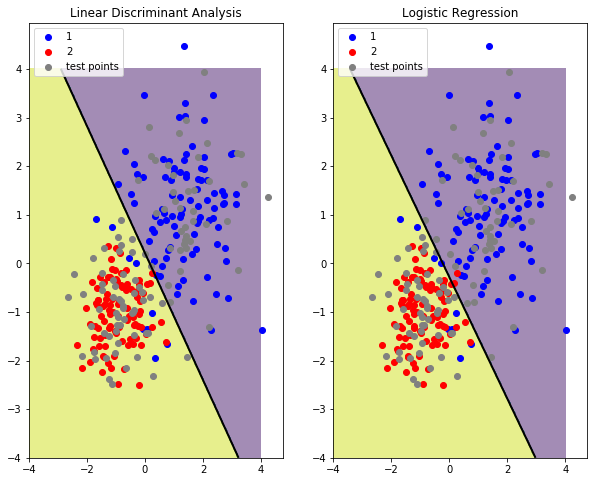

In [233]:


pl.figure(1, (10,8))
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.5)
pl.scatter(twogaussians_x_train[twogaussians_y_train==1,0], twogaussians_x_train[twogaussians_y_train==1,1], c='b', label='1')
pl.scatter(twogaussians_x_train[twogaussians_y_train==2,0], twogaussians_x_train[twogaussians_y_train==2,1], c='r', label='2')
pl.scatter(twogaussians_x_test[:,0], twogaussians_x_test[:,1], c='grey', label='test points')
pl.contour(xx, yy, zz_lda, [0.5], linewidths=2., colors='k')
#plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
#plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Linear Discriminant Analysis')

splot = pl.subplot(1, 2, 2)
pl.contourf(xx, yy, zz_lg > 0.5, alpha=0.5)
pl.scatter(twogaussians_x_train[twogaussians_y_train==1,0], twogaussians_x_train[twogaussians_y_train==1,1], c='b', label='1')
pl.scatter(twogaussians_x_train[twogaussians_y_train==2,0], twogaussians_x_train[twogaussians_y_train==2,1], c='r', label='2')
pl.scatter(twogaussians_x_test[:,0], twogaussians_x_test[:,1], c='grey', label='test points')
pl.contour(xx, yy, zz_lg, [0.5], linewidths=2., colors='black')
#plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'b')
#plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'r')
pl.legend()
pl.axis('tight')
pl.title('Logistic Regression')
pl.show()

Text(0.5,1,'Decision boundary for LDA and Logistic Regression')

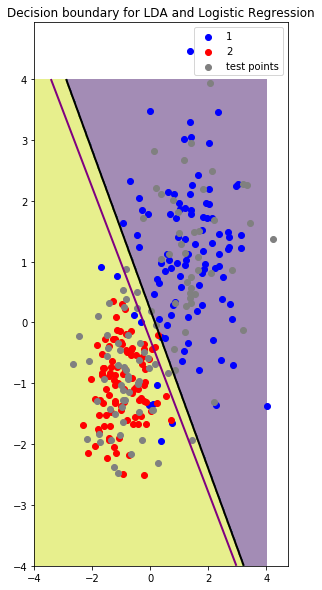

In [242]:
pl.figure(1, (10,10))
splot = pl.subplot(1, 2, 1)
pl.contourf(xx, yy, zz_lda > 0.5, alpha=0.5)
pl.scatter(twogaussians_x_train[twogaussians_y_train==1,0], twogaussians_x_train[twogaussians_y_train==1,1], c='b', label='1')
pl.scatter(twogaussians_x_train[twogaussians_y_train==2,0], twogaussians_x_train[twogaussians_y_train==2,1], c='r', label='2')
pl.scatter(twogaussians_x_test[:,0], twogaussians_x_test[:,1], c='grey', label='test points')
pl.contour(xx, yy, zz_lda, [0.5], linewidths=2., colors='black')
pl.contour(xx, yy, zz_lg, [0.5], linewidths=2., colors='purple')
#plot_ellipse(splot, lda.means_[0], lda.covariance_, 'b')
#plot_ellipse(splot, lda.means_[1], lda.covariance_, 'r')
pl.legend()
pl.axis('tight')
pl.title('Decision boundary for LDA and Logistic Regression')

# Problem 4

In [243]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [244]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [245]:
pca95 = PCA(0.95)
pca95.fit(x_train)
x_train_transformed_95 = pca95.transform(x_train)
x_test_transformed_95=pca95.transform(x_test)

# one vs one 

In [249]:
from sklearn.multiclass import OneVsOneClassifier

lr_ovo = OneVsOneClassifier(LogisticRegression())
lr_ovo_fit = lr_ovo.fit(x_train_transformed_95, y_train)
pred_lr_ovo = lr_ovo.predict(x_test_transformed_95)
error_lr_ovo = sum(pred_lr_ovo!=y_test)/len(y_test)

0.07075236671649228


In [250]:
error_lr_ovo

0.07075236671649228

# one vs rest

In [252]:
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr_fit = lr_ovr.fit(x_train_transformed_95,y_train)
pred_lr_ovr = lr_ovr.predict(x_test_transformed_95)
error_lr_ovr = sum(pred_lr_ovr!=y_test)/len(y_test)


In [253]:
error_lr_ovr

0.09267563527653214

# multinominal

In [254]:
lr_mul = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_mul_fit = lr_mul.fit(x_train_transformed_95,y_train)
pred_lr_mul = lr_mul.predict(x_test_transformed_95)
error_lr_mul = sum(pred_lr_mul!=y_test)/len(y_test)

In [255]:
error_lr_mul

0.08868958644743398

# LDA

In [246]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_lda=sum(x_test_pred!=y_test)/len(y_test)

In [247]:
error_lda

0.11858495266567015

In [256]:
data={'Error':[error_lr_ovo,error_lr_ovr, error_lr_mul,error_lda]}

In [263]:
df=pd.DataFrame(data, index=['One vs One','One vs Rest','Multinomial','LDA'])

In [264]:
df

,Error
One vs One,0.070752
One vs Rest,0.092676
Multinomial,0.088690
LDA,0.118585


In [265]:
df['Error'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Error']], index = df.index)

In [266]:
df

,Error
One vs One,7.08%
One vs Rest,9.27%
Multinomial,8.87%
LDA,11.86%


# Problem 5

In [378]:
from mlxtend.data import loadlocal_mnist

In [379]:
x_train,y_train=loadlocal_mnist(images_path='train-images.idx3-ubyte',
                                labels_path='train-labels.idx1-ubyte')

In [380]:
x_test,y_test=loadlocal_mnist(images_path='t10k-images.idx3-ubyte',
                                labels_path='t10k-labels.idx1-ubyte')

In [381]:
x_train01=x_train[np.where((y_train==0)|(y_train==1))]
x_train012=x_train[np.where((y_train==0)|(y_train==1)|(y_train==2))]
x_train49=x_train[np.where((y_train==4)|(y_train==9))]
x_train358=x_train[np.where((y_train==3)|(y_train==5)|(y_train==8))]

x_test01=x_test[np.where((y_test==0)|(y_test==1))]
x_test012=x_test[np.where((y_test==0)|(y_test==1)|(y_test==2))]
x_test49=x_test[np.where((y_test==4)|(y_test==9))]
x_test358=x_test[np.where((y_test==3)|(y_test==5)|(y_test==8))]



y_train01=y_train[np.where((y_train==0)|(y_train==1))]
y_train012=y_train[np.where((y_train==0)|(y_train==1)|(y_train==2))]
y_train49=y_train[np.where((y_train==4)|(y_train==9))]
y_train358=y_train[np.where((y_train==3)|(y_train==5)|(y_train==8))]


y_test01=y_test[np.where((y_test==0)|(y_test==1))]
y_test012=y_test[np.where((y_test==0)|(y_test==1)|(y_test==2))]
y_test49=y_test[np.where((y_test==4)|(y_test==9))]
y_test358=y_test[np.where((y_test==3)|(y_test==5)|(y_test==8))]

# 4 and 9

In [1]:
pca95 = PCA(0.95)
pca95.fit(x_train49)
x_train_transformed_95 = pca95.transform(x_train49)
x_test_transformed_95=pca95.transform(x_test49)

NameError: name 'PCA' is not defined

In [333]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train49)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_49_lda=sum(x_test_pred!=y_test49)/len(y_test49)

In [334]:
error_49_lda

0.052737317930688095

In [335]:
lr_ovo = OneVsOneClassifier(LogisticRegression())
lr_ovo_fit = lr_ovo.fit(x_train_transformed_95, y_train49)
pred_lr_ovo = lr_ovo.predict(x_test_transformed_95)
error_lr_ovo_49 = sum(pred_lr_ovo!=y_test49)/len(y_test49)

In [336]:
error_lr_ovo_49

0.03666499246609744

In [337]:
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr_fit = lr_ovr.fit(x_train_transformed_95,y_train49)
pred_lr_ovr = lr_ovr.predict(x_test_transformed_95)
error_lr_ovr_49 = sum(pred_lr_ovr!=y_test49)/len(y_test49)

In [338]:
error_lr_ovr_49

0.0371672526368659

In [340]:
lr_mul = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_mul_fit = lr_mul.fit(x_train_transformed_95,y_train49)
pred_lr_mul = lr_mul.predict(x_test_transformed_95)
error_lr_mul_49 = sum(pred_lr_mul!=y_test49)/len(y_test49)

In [341]:
error_lr_mul_49

0.03465595178302361

# 0 ,1 and 2

In [382]:
pca95 = PCA(0.95)
pca95.fit(x_train012)
x_train_transformed_95 = pca95.transform(x_train012)
x_test_transformed_95=pca95.transform(x_test012)

In [383]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train012)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_012_lda=sum(x_test_pred!=y_test012)/len(y_test012)

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [384]:
error_012_lda

0.0292341912932952

In [385]:
lr_ovo = OneVsOneClassifier(LogisticRegression())
lr_ovo_fit = lr_ovo.fit(x_train_transformed_95, y_train012)
pred_lr_ovo = lr_ovo.predict(x_test_transformed_95)
error_lr_ovo_012 = sum(pred_lr_ovo!=y_test012)/len(y_test012)

In [386]:
error_lr_ovo_012

0.010168414362885288

In [387]:
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr_fit = lr_ovr.fit(x_train_transformed_95,y_train012)
pred_lr_ovr = lr_ovr.predict(x_test_transformed_95)
error_lr_ovr_012 = sum(pred_lr_ovr!=y_test012)/len(y_test012)

In [388]:
lr_mul = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_mul_fit = lr_mul.fit(x_train_transformed_95,y_train012)
pred_lr_mul = lr_mul.predict(x_test_transformed_95)
error_lr_mul_012 = sum(pred_lr_mul!=y_test012)/len(y_test012)

In [389]:
error_lr_mul_012

0.010168414362885288

# 3, 5 and 8

In [292]:
pca95 = PCA(0.95)
pca95.fit(x_train358)
x_train_transformed_95 = pca95.transform(x_train358)
x_test_transformed_95=pca95.transform(x_test358)

In [295]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_transformed_95,y_train358)
#x_train_LDA=lda.transform(x_train_transformed_95)
x_test_LDA=lda.transform(x_test_transformed_95)
x_test_pred=lda.predict(x_test_transformed_95)
error_358_lda=sum(x_test_pred!=y_test358)/len(y_test358)

In [296]:
lr_ovo = OneVsOneClassifier(LogisticRegression())
lr_ovo_fit = lr_ovo.fit(x_train_transformed_95, y_train358)
pred_lr_ovo = lr_ovo.predict(x_test_transformed_95)
error_lr_ovo_358 = sum(pred_lr_ovo!=y_test358)/len(y_test358)

In [297]:
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr_fit = lr_ovr.fit(x_train_transformed_95,y_train358)
pred_lr_ovr = lr_ovr.predict(x_test_transformed_95)
error_lr_ovr_358 = sum(pred_lr_ovr!=y_test358)/len(y_test358)

In [298]:
lr_mul = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr_mul_fit = lr_mul.fit(x_train_transformed_95,y_train358)
pred_lr_mul = lr_mul.predict(x_test_transformed_95)
error_lr_mul_358 = sum(pred_lr_mul!=y_test358)/len(y_test358)

In [390]:
data={'4 and 9':[error_49_lda,error_lr_ovo_49,error_lr_ovr_49,error_lr_mul_49],
       '0, 1 and 2':[error_012_lda,error_lr_ovo_012,error_lr_ovr_012,error_lr_mul_012],
      '3,5 and 8':[error_358_lda,error_lr_ovo_358,error_lr_ovr_358,error_lr_mul_358]}

In [391]:
df=pd.DataFrame(data, index=['LDA','One vs One','One vs Rest','Multinomial'])

In [392]:
df

,4 and 9,"0, 1 and 2","3,5 and 8"
LDA,0.052737,0.029234,0.074757
One vs One,0.036665,0.010168,0.060153
One vs Rest,0.037167,0.013664,0.067455
Multinomial,0.034656,0.010168,0.065716


In [393]:
df['4 and 9'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['4 and 9']], index = df.index)

In [394]:
df['0, 1 and 2'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['0, 1 and 2']], index = df.index)

In [395]:
df['3,5 and 8'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['3,5 and 8']], index = df.index)

In [396]:
df

,4 and 9,"0, 1 and 2","3,5 and 8"
LDA,5.27%,2.92%,7.48%
One vs One,3.67%,1.02%,6.02%
One vs Rest,3.72%,1.37%,6.75%
Multinomial,3.47%,1.02%,6.57%


# Problem 6

In [313]:
train = np.loadtxt('zip.train')
test  = np.loadtxt('zip.test')

In [314]:
y_train=train[:,0]
x_train=train[:,1:]
y_test=test[:,0]
x_test=test[:,1:]

In [324]:
lr_mul = LogisticRegression(multi_class='multinomial',penalty='l1',solver='saga')
lr_mul_fit = lr_mul.fit(x_train,y_train)
pred_lr_mul = lr_mul.predict(x_test)
error_lr_mul_all = sum(pred_lr_mul!=y_test)/len(y_test)

/Users/xinzhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [325]:
error_lr_mul_all

0.08719481813652218

In [326]:
data={'Multinomial':[error_lr_mul,error_lr_mul_all]}

In [327]:
data

{'Multinomial': [0.08868958644743398, 0.08719481813652218]}

In [328]:
df=pd.DataFrame(data,index=['95% PCA','No PCA'])

In [329]:
df

,Multinomial
95% PCA,0.088690
No PCA,0.087195


In [330]:
df['Multinomial'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['Multinomial']], index = df.index)

In [331]:
df

,Multinomial
95% PCA,8.87%
No PCA,8.72%
